In [16]:
import os
os.chdir('/home/datahouse1/zengchuanlong/workplace/GeoBFN')
os.getcwd()

'/home/datahouse1/zengchuanlong/workplace/GeoBFN'

In [17]:
import pickle

with open('dataset/compete/data_all.pkl', 'rb') as f:
    data = pickle.load(f)

In [18]:
_data_list = data

Example molecule data structure:
Keys: ['natoms', 'elements', 'coordinates']
Example natoms: 23
Example elements (first 5): ['O', 'C', 'N', 'C', 'C']
Example coordinates (first 2): [[-1.1114834526, 1.6094932194, -1.9331164053], [-1.5420758704, 0.9264053946, -1.0295958406]]

Total number of molecules: 45854
Molecule size statistics:
  Min atoms: 3
  Max atoms: 60
  Average atoms: 23.52
  Median atoms: 23.0

Element frequency distribution:
  H: 503261 (46.66%)
  C: 390055 (36.17%)
  N: 87438 (8.11%)
  O: 67606 (6.27%)
  S: 13832 (1.28%)
  F: 7875 (0.73%)
  Cl: 5878 (0.55%)
  P: 1388 (0.13%)
  Br: 1184 (0.11%)


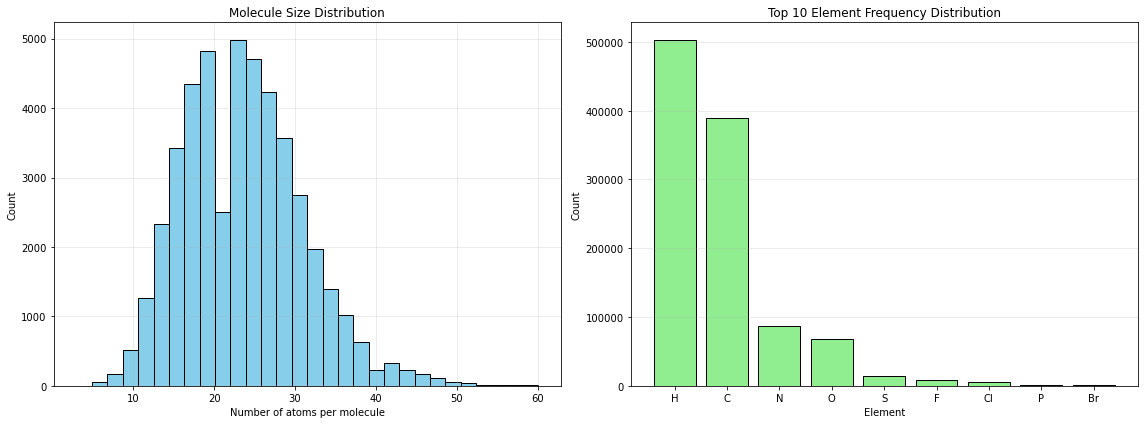

In [19]:
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt

# Check data structure for one example
print(f"Example molecule data structure:")
print(f"Keys: {list(_data_list[0].keys())}")
print(f"Example natoms: {_data_list[0]['natoms']}")
print(f"Example elements (first 5): {_data_list[0]['elements'][:5]}")
print(f"Example coordinates (first 2): {_data_list[0]['coordinates'][:2]}")

# 1. Molecule size distribution
molecule_sizes = [molecule['natoms'] for molecule in _data_list]
print(f"\nTotal number of molecules: {len(_data_list)}")
print(f"Molecule size statistics:")
print(f"  Min atoms: {min(molecule_sizes)}")
print(f"  Max atoms: {max(molecule_sizes)}")
print(f"  Average atoms: {np.mean(molecule_sizes):.2f}")
print(f"  Median atoms: {np.median(molecule_sizes)}")

# 2. Element frequency distribution
all_elements = []
for molecule in _data_list:
    all_elements.extend(molecule['elements'])

element_counts = Counter(all_elements)
print(f"\nElement frequency distribution:")
for element, count in sorted(element_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"  {element}: {count} ({count/len(all_elements)*100:.2f}%)")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot molecule size histogram
ax1.hist(molecule_sizes, bins=30, color='skyblue', edgecolor='black', density=False)
ax1.set_xlabel('Number of atoms per molecule')
ax1.set_ylabel('Count')
ax1.set_title('Molecule Size Distribution')
ax1.grid(alpha=0.3)

# Plot element frequency
elements = [e for e, c in element_counts.most_common(10)]
counts = [c for e, c in element_counts.most_common(10)]
ax2.bar(elements, counts, color='lightgreen', edgecolor='black')
ax2.set_xlabel('Element')
ax2.set_ylabel('Count')
ax2.set_title('Top 10 Element Frequency Distribution')
ax2.grid(axis='y', alpha=0.3)

fig.tight_layout()
plt.show()

In [20]:
element_counts

Counter({'O': 67606,
         'C': 390055,
         'N': 87438,
         'Cl': 5878,
         'H': 503261,
         'S': 13832,
         'F': 7875,
         'P': 1388,
         'Br': 1184})

In [9]:
import collections
import pprint # For potentially larger lists

# Assuming _data_list is already defined from your previous inputs

def calculate_natom_histogram(data_list):
    """
    Calculates the distribution (histogram) of the number of atoms per molecule.

    Args:
        data_list: A list of dictionaries, where each dictionary is expected
                   to have an integer key 'natoms'.

    Returns:
        A list where the index represents the number of atoms (starting from 0)
        and the value at that index is the count of molecules with that many
        atoms. Returns an empty list if the input data_list is empty or contains
        no valid 'natoms' entries.
    """
    if not data_list:
        print("Input data_list is empty.")
        return []

    # --- Extract 'natoms' values with basic validation ---
    all_natoms = []
    for i, item in enumerate(data_list):
        num_atoms = item.get('natoms') # Use .get() for safety
        if num_atoms is None:
            print(f"Warning: Molecule at index {i} missing 'natoms' key. Skipping.")
            continue
        # Check if it's a non-negative integer
        if isinstance(num_atoms, int) and num_atoms >= 0:
            all_natoms.append(num_atoms)
        else:
            print(f"Warning: Molecule at index {i} has invalid 'natoms' value ({num_atoms}). Skipping.")
            continue

    if not all_natoms:
        print("No valid 'natoms' values found in the data_list.")
        return []

    # --- Method 1: Using basic list manipulation (closer to example output structure) ---

    # Find the maximum number of atoms to determine histogram size
    max_natoms = max(all_natoms)

    # Initialize histogram with zeros. Length is max_natoms + 1 to cover index 0 to max_natoms.
    histogram = [0] * (max_natoms + 1)

    # Populate the histogram
    for num_atoms in all_natoms:
        histogram[num_atoms] += 1

    return histogram

    # --- Method 2: Using collections.Counter (More Pythonic for counting) ---
    # counts = collections.Counter(all_natoms)
    # max_natoms = max(counts.keys()) if counts else -1
    # # Create the list representation, filling in zeros for missing counts
    # histogram = [counts.get(i, 0) for i in range(max_natoms + 1)]
    # return histogram


# --- Example Usage ---

# Calculate the histogram
n_atom_histogram = calculate_natom_histogram(_data_list)

# Print the result
print(f"n_atom_histogram: {n_atom_histogram}")

# If you have a much larger dataset and the output list is very long,
# you might want to print it differently, e.g., showing non-zero counts:
# print("\nAtom Count Distribution (Non-zero counts):")
# for num_atoms, count in enumerate(n_atom_histogram):
#     if count > 0:
#         print(f"  Atoms: {num_atoms}, Count: {count}")

n_atom_histogram: [0, 0, 0, 1, 2, 17, 35, 60, 115, 207, 314, 489, 772, 1000, 1331, 1582, 1837, 2061, 2281, 2385, 2435, 2502, 2524, 2461, 2404, 2296, 2203, 2024, 1904, 1668, 1479, 1265, 1078, 889, 763, 635, 556, 461, 350, 278, 228, 174, 159, 130, 91, 84, 84, 58, 51, 29, 25, 15, 20, 6, 5, 4, 9, 6, 5, 4, 3]


In [ ]:
def merge_data_list_to_dict(data_list):
    """
    Merges a list of dictionaries (each representing a molecular structure)
    into a single dictionary representing the combined system.

    Args:
        data_list: A list of dictionaries, where each dictionary has keys
                   'natoms' (int), 'elements' (list of str), and
                   'coordinates' (list of list of float).

    Returns:
        A single dictionary with the same keys, containing the merged data.
        Returns an empty dict with initialized keys if the input list is empty.
    """
    if not data_list: # Handle empty input list
        return {'natoms': 0, 'elements': [], 'coordinates': []}

    # Initialize the merged dictionary
    merged_data = {
        'natoms': 0,
        'elements': [],
        'coordinates': []
    }

    # Iterate through each dictionary in the list
    for item_dict in data_list:
        # Basic check if keys exist (optional but good practice)
        if all(key in item_dict for key in ['natoms', 'elements', 'coordinates']):
            merged_data['natoms'] += item_dict['natoms']
            merged_data['elements'].extend(item_dict['elements'])
            merged_data['coordinates'].extend(item_dict['coordinates'])
        else:
             # Handle cases where a dictionary might be malformed
             print(f"Warning: Skipping dictionary due to missing keys: {item_dict}")

    # Optional sanity check: ensure lengths match the total atom count
    # assert merged_data['natoms'] == len(merged_data['elements'])
    # assert merged_data['natoms'] == len(merged_data['coordinates'])

    return merged_data

# --- Example Usage ---
_data_dict = merge_data_list_to_dict(_data_list)


In [20]:
_data_dict

{'natoms': 72,
 'elements': ['O',
  'C',
  'N',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'Cl',
  'C',
  'C',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'C',
  'C',
  'C',
  'C',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'O',
  'S',
  'O',
  'C',
  'C',
  'N',
  'S',
  'O',
  'O',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'C',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H',
  'H'],
 'coordinates': [[-1.1114834526, 1.6094932194, -1.9331164053],
  [-1.5420758704, 0.9264053946, -1.0295958406],
  [-2.7998947492, 0.3901707568, -0.9499828031],
  [-3.0798225155, -0.3450547044, 0.2701855393],
  [-1.6644553062, -0.6583011355, 0.7908986734],
  [-0.8085545958, 0.5176051925, 0.2691921396],
  [0.6697544643, 0.2462745422, 0.1225187619],
  [1.1817921402, -0.4470233574, -0.9860740901],
  [2.5424282061, -0.7382418619, -1.0923697091],
  [3.4130793875, -0.333

In [ ]:
import numpy as np
import pprint

# --- Input Data ---
_data_list
# --- Configuration ---

charge_map = {
    'H': 1,   # Hydrogen
    'C': 6,   # Carbon
    'N': 7,   # Nitrogen
    'O': 8,   # Oxygen
    'F': 9,   # Fluorine
    'P': 15,  # Phosphorus
    'S': 16,  # Sulfur
    'Cl': 17, # Chlorine
    'Br': 35, # Bromine
    # Add other elements if needed
}
DEFAULT_CHARGE = 0 # Charge for elements not in the map
ELEMENT_PADDING_VALUE = None # Value to use for padding element lists
CHARGE_PADDING_VALUE = 0    # Value to use for padding charge lists
COORD_PADDING_VALUE = 0.0     # Value to use for padding coordinate arrays

# --- Function ---
def process_molecular_data(data_list):
    """
    Processes a list of molecular data dictionaries into a single dictionary
    with structured, padded arrays and charge information.

    Args:
        data_list: A list of dictionaries, where each dictionary has keys
                   'natoms' (int), 'elements' (list of str), and
                   'coordinates' (list of list of float).

    Returns:
        A single dictionary containing:
        - 'natoms': List of atom counts for each molecule.
        - 'elements': List of lists, padded with ELEMENT_PADDING_VALUE.
                      Shape: (num_molecules, max_atoms)
        - 'coordinates': NumPy array of coordinates, padded with COORD_PADDING_VALUE.
                         Shape: (num_molecules, max_atoms, 3)
        - 'charge': List of lists of charges, padded with CHARGE_PADDING_VALUE.
                    Shape: (num_molecules, max_atoms)
    """
    num_molecules = len(data_list)

    if num_molecules == 0:
        return {
            'natoms': [],
            'elements': [],
            'coordinates': np.empty((0, 0, 3), dtype=float), # Shape (0, 0, 3)
            'charge': []
        }

    # 1. Collect natoms and find max_atoms
    natoms_list = [item.get('natoms', 0) for item in data_list]
    max_atoms = max(natoms_list) if natoms_list else 0

    # 2. Initialize padded structures
    # Use lists for elements and charges first, easier to build
    padded_elements = [[ELEMENT_PADDING_VALUE] * max_atoms for _ in range(num_molecules)]
    padded_charges = [[CHARGE_PADDING_VALUE] * max_atoms for _ in range(num_molecules)]
    # Use NumPy array initialized with padding value for coordinates
    padded_coords = np.full((num_molecules, max_atoms, 3), fill_value=COORD_PADDING_VALUE, dtype=float)

    # 3. Populate padded structures
    for i, item_dict in enumerate(data_list):
        current_natoms = item_dict.get('natoms', 0)
        current_elements = item_dict.get('elements', [])
        current_coords = item_dict.get('coordinates', [])

        if current_natoms > 0: # Ensure there are atoms to process
            # Pad elements
            padded_elements[i][:current_natoms] = current_elements

            # Calculate and pad charges
            charges = [charge_map.get(el, DEFAULT_CHARGE) for el in current_elements]
            padded_charges[i][:current_natoms] = charges

            # Pad coordinates
            coords_array = np.array(current_coords, dtype=float)
            # Ensure coords_array is not empty and has the right dimension before assigning
            if coords_array.size > 0 and coords_array.shape == (current_natoms, 3):
                 padded_coords[i, :current_natoms, :] = coords_array
            elif current_natoms > 0 : # Handle cases with natoms > 0 but empty/malformed coords
                print(f"Warning: Molecule {i} has {current_natoms} atoms but coordinates are missing or malformed. Padding with zeros.")


    # 4. Assemble final dictionary
    processed_data = {
        'natoms': natoms_list,
        'elements': padded_elements,
        'coordinates': padded_coords,
        'charge': padded_charges
    }

    return processed_data

# --- Example Usage ---
_processed_data_dict = process_molecular_data(_data_list, element_charge_map)

# --- Print Results ---
print("Processed Data Dictionary:")
print("-" * 30)
print(f"natoms: {_processed_data_dict['natoms']}")
print("-" * 30)
print("elements (Padded, showing first molecule, first 5 & last 5 of padding):")
print(f"  Molecule 0 Elements: {_processed_data_dict['elements'][0][:5]} ... {_processed_data_dict['elements'][0][-5:]} (Total length: {len(_processed_data_dict['elements'][0])})")
print(f"  Molecule 1 Elements: {_processed_data_dict['elements'][1][:5]} ... {_processed_data_dict['elements'][1][-5:]} (Total length: {len(_processed_data_dict['elements'][1])})")
print("-" * 30)
print(f"charge (Padded, showing charge sum for each molecule):")
# Since we used 0.0, sum will be 0 unless charge map changes
print(f"  Molecule 0 Charge Sum: {sum(_processed_data_dict['charge'][0]):.2f} (Total length: {len(_processed_data_dict['charge'][0])})")
print(f"  Molecule 1 Charge Sum: {sum(_processed_data_dict['charge'][1]):.2f} (Total length: {len(_processed_data_dict['charge'][1])})")
# For detailed view:
# print("Charge details for molecule 1 (first 12):", _processed_data_dict['charge'][1][:12])
print("-" * 30)
print(f"coordinates shape: {_processed_data_dict['coordinates'].shape}")
print("coordinates (showing coords of atom 0 for each molecule):")
# Add check if coordinates exist before accessing
if _processed_data_dict['coordinates'].shape[0] > 0:
    print(f"  Molecule 0, Atom 0: {_processed_data_dict['coordinates'][0, 0, :]}")
if _processed_data_dict['coordinates'].shape[0] > 1:
    print(f"  Molecule 1, Atom 0: {_processed_data_dict['coordinates'][1, 0, :]}")
print("coordinates (showing coords of padding for molecule 1, atom index 15):")
if _processed_data_dict['coordinates'].shape[0] > 1 and _processed_data_dict['coordinates'].shape[1] > 15:
     print(f"  Molecule 1, Atom 15 (padded): {_processed_data_dict['coordinates'][1, 15, :]}")
print("-" * 30)
# pprint.pprint(_processed_data_dict) # Uncomment for full dictionary view

Processed Data Dictionary:
------------------------------
natoms: [23, 10]
------------------------------
elements (Padded, showing first molecule, first 5 & last 5 of padding):
  Molecule 0 Elements: ['O', 'C', 'N', 'C', 'C'] ... ['H', 'H', 'H', 'H', 'H'] (Total length: 23)
  Molecule 1 Elements: ['C', 'C', 'C', 'C', 'H'] ... [None, None, None, None, None] (Total length: 23)
------------------------------
charge (Padded, showing charge sum for each molecule):
  Molecule 0 Charge Sum: 102.00 (Total length: 23)
  Molecule 1 Charge Sum: 30.00 (Total length: 23)
------------------------------
coordinates shape: (2, 23, 3)
coordinates (showing coords of atom 0 for each molecule):
  Molecule 0, Atom 0: [-1.11148345  1.60949322 -1.93311641]
  Molecule 1, Atom 0: [ 1.14891814  0.06600502 -0.24786282]
coordinates (showing coords of padding for molecule 1, atom index 15):
  Molecule 1, Atom 15 (padded): [0. 0. 0.]
------------------------------


In [24]:
_processed_data_dict

{'natoms': [23, 10],
 'elements': [['O',
   'C',
   'N',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'C',
   'Cl',
   'C',
   'C',
   'H',
   'H',
   'H',
   'H',
   'H',
   'H',
   'H',
   'H',
   'H',
   'H'],
  ['C',
   'C',
   'C',
   'C',
   'H',
   'H',
   'H',
   'H',
   'H',
   'H',
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None]],
 'coordinates': array([[[-1.11148345e+00,  1.60949322e+00, -1.93311641e+00],
         [-1.54207587e+00,  9.26405395e-01, -1.02959584e+00],
         [-2.79989475e+00,  3.90170757e-01, -9.49982803e-01],
         [-3.07982252e+00, -3.45054704e-01,  2.70185539e-01],
         [-1.66445531e+00, -6.58301136e-01,  7.90898673e-01],
         [-8.08554596e-01,  5.17605193e-01,  2.69192140e-01],
         [ 6.69754464e-01,  2.46274542e-01,  1.22518762e-01],
         [ 1.18179214e+00, -4.47023357e-01, -9.86074090e-01],
         [ 2.54242821e+00, -7.38241862e-01, -1.09236971e+00],
         